In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [86]:
data = pd.read_csv("https://raw.githubusercontent.com/imhardikj/Universities-Clustering/master/College_Data")

In [87]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [88]:
data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [89]:
data.rename(columns={'Unnamed: 0':'Name','P.Undergrad':'p_ug','F.Undergrad':'f_ug','Room.Board':'rb','S.F.Ratio':'sfr','perc.alumni':'pa','Grad.Rate':'gr'},inplace = True)

In [90]:
data.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,f_ug,p_ug,Outstate,rb,Books,Personal,PhD,Terminal,sfr,pa,Expend,gr
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [91]:
data.columns

Index(['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'f_ug', 'p_ug', 'Outstate', 'rb', 'Books', 'Personal', 'PhD',
       'Terminal', 'sfr', 'pa', 'Expend', 'gr'],
      dtype='object')

In [92]:
data.isnull().sum()

Name         0
Private      0
Apps         0
Accept       0
Enroll       0
Top10perc    0
Top25perc    0
f_ug         0
p_ug         0
Outstate     0
rb           0
Books        0
Personal     0
PhD          0
Terminal     0
sfr          0
pa           0
Expend       0
gr           0
dtype: int64

In [93]:
data.gr.describe()

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: gr, dtype: float64

In [94]:
data.gr[data.gr>100]=100

C:\Users\senth\AppData\Local\Temp/ipykernel_14812/408757545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.gr[data.gr>100]=100


In [95]:
data.gr[data.gr==100]

16     100
95     100
126    100
238    100
250    100
251    100
317    100
377    100
511    100
522    100
668    100
Name: gr, dtype: int64

In [96]:
data[data.gr==100]

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,f_ug,p_ug,Outstate,rb,Books,Personal,PhD,Terminal,sfr,pa,Expend,gr
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100
126,College of Mount St. Joseph,Yes,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
238,Grove City College,Yes,2491,1110,573,57,88,2213,35,5224,3048,525,350,65,65,18.4,18,4957,100
250,Harvard University,Yes,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
251,Harvey Mudd College,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100
317,Lindenwood College,Yes,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
377,Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
511,Santa Clara University,Yes,4019,2779,888,40,73,3891,128,13584,5928,630,1278,88,92,13.9,19,10872,100
522,Siena College,Yes,2961,1932,628,24,68,2669,616,10800,5100,575,1090,71,82,14.1,42,8189,100


In [97]:
df=pd.DataFrame(data)
df["Total_exp"]=df.apply(lambda row:row.Expend/row.Outstate,axis=1)

In [98]:
data.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,f_ug,p_ug,Outstate,rb,Books,Personal,PhD,Terminal,sfr,pa,Expend,gr,Total_exp
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.946371
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.857248
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.776444
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1.444709


In [120]:
z = data.Total_exp.unique().max()

In [123]:
data[data.Total_exp == z]

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,f_ug,p_ug,Outstate,rb,Books,Personal,PhD,Terminal,sfr,pa,Expend,gr,Total_exp
603,University of Alabama at Birmingham,No,1797,1260,938,24,35,6960,4698,4440,5175,750,2200,96,96,6.7,16,16352,33,3.682883


In [124]:
data.drop(['Name','Private'],axis=1)

,Apps,Accept,Enroll,Top10perc,Top25perc,f_ug,p_ug,Outstate,rb,Books,Personal,PhD,Terminal,sfr,pa,Expend,gr,Total_exp
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.946371
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.857248
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.776444
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1.467284
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1.444709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0.657496
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0.797656
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1.206232
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,2.035585


# Clustering

In [125]:
from sklearn.preprocessing import normalize

In [126]:
a = data.iloc[0:,2:]

In [127]:
x=normalize(a,axis=1)
x

array([[1.43249941e-01, 1.06315618e-01, 6.22187995e-02, ...,
        6.07604115e-01, 5.17770869e-03, 8.16672198e-05],
       [1.21541258e-01, 1.06974099e-01, 2.84671199e-02, ...,
        5.85299552e-01, 3.11359124e-03, 4.76628300e-05],
       [9.56484377e-02, 7.34778264e-02, 2.25055147e-02, ...,
        5.85076403e-01, 3.61695773e-03, 5.20067913e-05],
       ...,
       [1.70141193e-01, 1.55374528e-01, 5.63891890e-02, ...,
        6.75290964e-01, 3.97564066e-03, 9.78682557e-05],
       [2.27122872e-01, 5.20441294e-02, 2.79421600e-02, ...,
        8.56850473e-01, 2.10043572e-03, 4.31880279e-05],
       [3.25152552e-01, 2.01792568e-01, 7.51690912e-02, ...,
        4.90502796e-01, 1.07695225e-02, 9.82971536e-05]])

In [128]:
b = pd.DataFrame(x)

In [129]:
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.143250,0.106316,0.062219,0.001985,0.004487,0.248961,0.046340,0.642036,0.284774,0.038833,0.189849,0.006041,0.006731,0.001562,0.001036,0.607604,0.005178,0.000082
1,0.121541,0.106974,0.028467,0.000890,0.001612,0.149174,0.068221,0.682766,0.358619,0.041700,0.083400,0.001612,0.001668,0.000678,0.000890,0.585300,0.003114,0.000048
2,0.095648,0.073478,0.022506,0.001474,0.003349,0.069392,0.006631,0.753533,0.251178,0.026792,0.078033,0.003550,0.004421,0.000864,0.002009,0.585076,0.003617,0.000052
3,0.017608,0.014737,0.005785,0.002534,0.003758,0.021535,0.002660,0.547243,0.230129,0.019001,0.036947,0.003885,0.004096,0.000325,0.001562,0.802961,0.002491,0.000062
4,0.013744,0.010397,0.003917,0.001139,0.003133,0.017732,0.061882,0.538354,0.293389,0.056969,0.106816,0.005412,0.005127,0.000847,0.000142,0.777765,0.001068,0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.215271,0.148446,0.053205,0.000392,0.002548,0.302673,0.198810,0.665998,0.382138,0.048992,0.117581,0.005879,0.005879,0.002058,0.001372,0.437891,0.003919,0.000064
773,0.121349,0.111809,0.043051,0.001487,0.002911,0.176479,0.068572,0.713597,0.307243,0.037166,0.077430,0.004522,0.004646,0.000824,0.001920,0.569205,0.005141,0.000049
774,0.170141,0.155375,0.056389,0.002759,0.004949,0.226612,0.013468,0.559835,0.340769,0.050061,0.063367,0.005436,0.006085,0.001168,0.001623,0.675291,0.003976,0.000098
775,0.227123,0.052044,0.027942,0.002016,0.002100,0.110687,0.001761,0.420936,0.138120,0.013366,0.044873,0.002037,0.002037,0.000123,0.001040,0.856850,0.002100,0.000043


In [135]:
from scipy.cluster import hierarchy

In [136]:
link=hierarchy.linkage(b)

In [137]:
link

array([[3.34000000e+02, 7.09000000e+02, 1.26665981e-02, 2.00000000e+00],
       [5.80000000e+01, 5.90000000e+02, 1.57435871e-02, 2.00000000e+00],
       [3.88000000e+02, 5.04000000e+02, 1.79086703e-02, 2.00000000e+00],
       ...,
       [6.03000000e+02, 1.54900000e+03, 3.01331930e-01, 7.75000000e+02],
       [2.80000000e+02, 1.55000000e+03, 3.53422483e-01, 7.76000000e+02],
       [4.83000000e+02, 1.55100000e+03, 3.64808092e-01, 7.77000000e+02]])

{'icoord': [[75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [185.0, 185.0, 195.0, 195.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [435.0, 435.0, 445.0, 445.0],
  [535.0, 535.0, 545.0, 545.0],
  [725.0, 725.0, 735.0, 735.0],
  [755.0, 755.0, 765.0, 765.0],
  [775.0, 775.0, 785.0, 785.0],
  [805.0, 805.0, 815.0, 815.0],
  [835.0, 835.0, 845.0, 845.0],
  [825.0, 825.0, 840.0, 840.0],
  [865.0, 865.0, 875.0, 875.0],
  [855.0, 855.0, 870.0, 870.0],
  [832.5, 832.5, 862.5, 862.5],
  [945.0, 945.0, 955.0, 955.0],
  [935.0, 935.0, 950.0, 950.0],
  [975.0, 975.0, 985.0, 985.0],
  [1055.0, 1055.0, 1065.0, 1065.0],
  [1115.0, 1115.0, 1125.0, 1125.0],
  [1145.0, 1145.0, 1155.0, 1155.0],
  [1135.0, 1135.0, 1150.0, 1150.0],
  [1175.0, 1175.0, 1

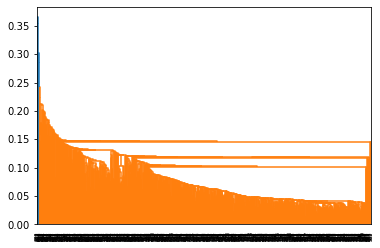

In [138]:
hierarchy.dendrogram(link)

{'icoord': [[75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [185.0, 185.0, 195.0, 195.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [435.0, 435.0, 445.0, 445.0],
  [535.0, 535.0, 545.0, 545.0],
  [725.0, 725.0, 735.0, 735.0],
  [755.0, 755.0, 765.0, 765.0],
  [775.0, 775.0, 785.0, 785.0],
  [805.0, 805.0, 815.0, 815.0],
  [835.0, 835.0, 845.0, 845.0],
  [825.0, 825.0, 840.0, 840.0],
  [865.0, 865.0, 875.0, 875.0],
  [855.0, 855.0, 870.0, 870.0],
  [832.5, 832.5, 862.5, 862.5],
  [945.0, 945.0, 955.0, 955.0],
  [935.0, 935.0, 950.0, 950.0],
  [975.0, 975.0, 985.0, 985.0],
  [1055.0, 1055.0, 1065.0, 1065.0],
  [1115.0, 1115.0, 1125.0, 1125.0],
  [1145.0, 1145.0, 1155.0, 1155.0],
  [1135.0, 1135.0, 1150.0, 1150.0],
  [1175.0, 1175.0, 1

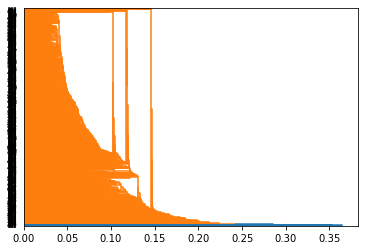

In [134]:
hierarchy.dendrogram(link,orientation='right')

# Agglomerative Clustering

In [147]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit_predict(x)

In [167]:
labels = clustering.labels_

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [162]:
data["aglo_clust"]= clustering

In [163]:
data.aglo_clust

0      0
1      0
2      0
3      0
4      0
      ..
772    1
773    0
774    0
775    0
776    1
Name: aglo_clust, Length: 777, dtype: int64

In [168]:
k=pd.DataFrame(label)

In [169]:
data=pd.concat([k,data],axis=1)

In [170]:
data.head()

,0,0,0,0,Name,Private,Apps,Accept,Enroll,Top10perc,...,Books,Personal,PhD,Terminal,sfr,pa,Expend,gr,Total_exp,aglo_clust
0,0,0,0,0,Abilene Christian University,Yes,1660,1232,721,23,...,450,2200,70,78,18.1,12,7041,60,0.946371,0
1,0,0,0,0,Adelphi University,Yes,2186,1924,512,16,...,750,1500,29,30,12.2,16,10527,56,0.857248,0
2,0,0,0,0,Adrian College,Yes,1428,1097,336,22,...,400,1165,53,66,12.9,30,8735,54,0.776444,0
3,0,0,0,0,Agnes Scott College,Yes,417,349,137,60,...,450,875,92,97,7.7,37,19016,59,1.467284,0
4,0,0,0,0,Alaska Pacific University,Yes,193,146,55,16,...,800,1500,76,72,11.9,2,10922,15,1.444709,0


In [171]:
data.to_csv('data.csv')

In [172]:
import os
os.getcwd()

'C:\\Users\\senth'